Visualization of Temporal Series EDA

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

btc_data = pd.read_csv('./Data/btc_data_aligned_with_sp500.csv', encoding='cp1252')
sp500_data = pd.read_csv('./Data/sp500_data_aligned_with_btc_data.csv', encoding='cp1252')

btc_data['Date'] = pd.to_datetime(btc_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

In [5]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2420 non-null   datetime64[ns]
 1   Open    2420 non-null   float64       
 2   High    2420 non-null   float64       
 3   Low     2420 non-null   float64       
 4   Close   2420 non-null   float64       
 5   Volume  2420 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 113.6 KB


Merging Data sets

In [7]:
# Rename the 'Close' columns for clarity
btc_data.rename(columns={"Close": "BTC_Price"}, inplace=True)
sp500_data.rename(columns={"Close": "SP500_Price"}, inplace=True)

In [8]:
# Merge the datasets based on the Date column
merged_data = pd.merge(btc_data[['Date', 'BTC_Price']], sp500_data[['Date', 'SP500_Price']], on="Date")

In [12]:
# Set the 'Date' column as the index for easier resampling
merged_data.set_index('Date', inplace=True)

In [13]:
merged_data

,BTC_Price,SP500_Price
Date,,
2014-09-18,424.440002,2011.359985
2014-09-19,394.795990,2010.400024
2014-09-22,402.152008,1994.290039
2014-09-23,435.790985,1982.770020
2014-09-24,423.204987,1998.300049
...,...,...
2024-04-24,64276.898438,5071.629883
2024-04-25,64481.707031,5048.419922
2024-04-26,63755.320313,5099.959961


In [24]:
# Resample the data to calculate mean prices for different intevals
weekly_data = merged_data.resample('W').mean() # 
monthly_data = merged_data.resample('ME').mean() # Montlhy average
quarterly_data = merged_data.resample('QE').mean() # Quarterly average
annual_data = merged_data.resample('YE').mean() # Annual average

Plot the results to visualize trends

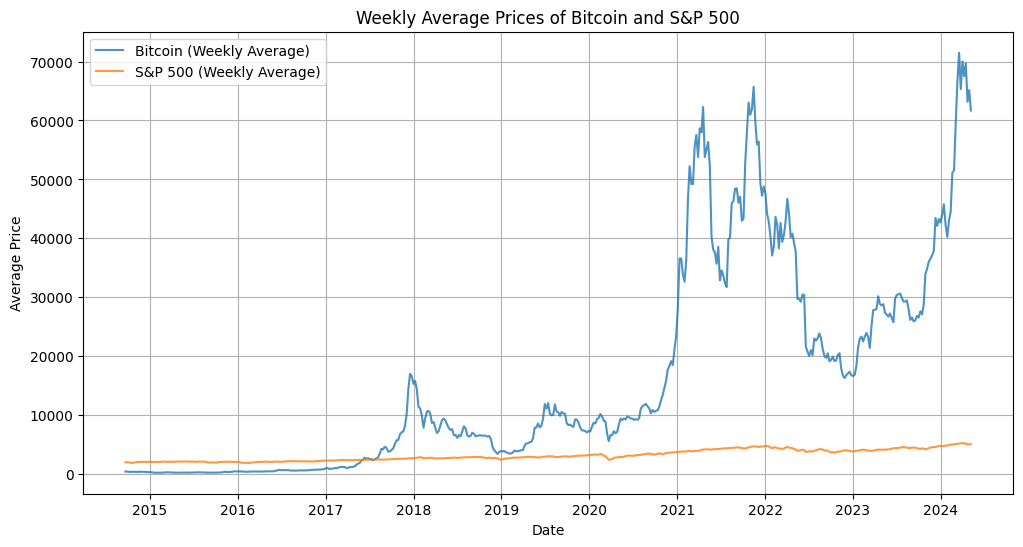

In [ ]:
# Weekly Trend
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['BTC_Price'], label='Bitcoin (Weekly Average)', alpha=0.8)
plt.plot(weekly_data.index, weekly_data['SP500_Price'], label='S&P 500 (Weekly Average)', alpha=0.8)
plt.title('Weekly Average Prices of Bitcoin and S&P 500')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

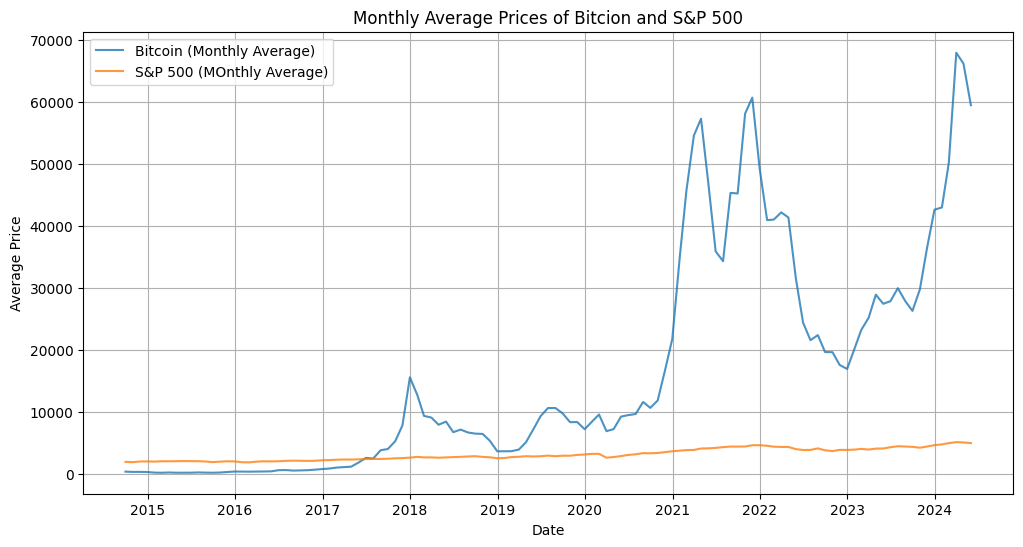

In [25]:
# Monthly Trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['BTC_Price'], label='Bitcoin (Monthly Average)', alpha=0.8)
plt.plot(monthly_data.index, monthly_data['SP500_Price'], label='S&P 500 (MOnthly Average)', alpha=0.8)
plt.title('Monthly Average Prices of Bitcion and S&P 500')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

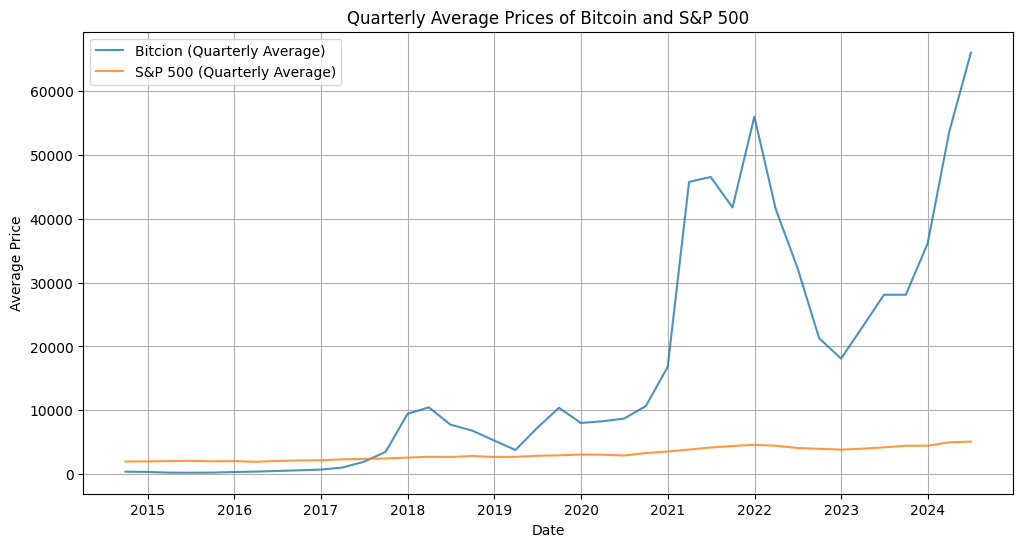

In [20]:
# Quarterly trend
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index, quarterly_data['BTC_Price'], label='Bitcion (Quarterly Average)', alpha=0.8)
plt.plot(quarterly_data.index, quarterly_data['SP500_Price'], label='S&P 500 (Quarterly Average)', alpha=0.8)
plt.title('Quarterly Average Prices of Bitcoin and S&P 500')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

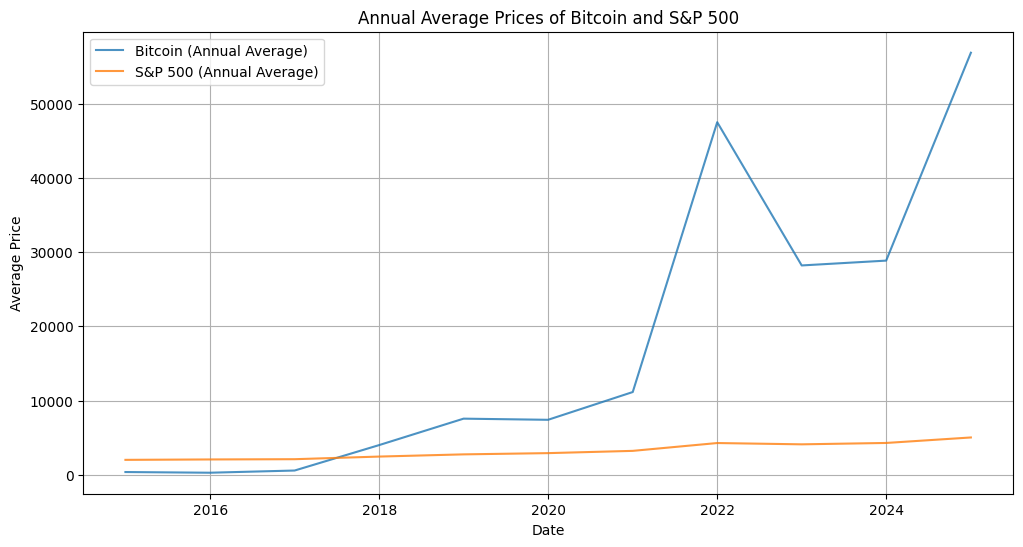

In [21]:
# Annual Trend
plt.figure(figsize=(12, 6))
plt.plot(annual_data.index, annual_data['BTC_Price'], label='Bitcoin (Annual Average)', alpha=0.8)
plt.plot(annual_data.index, annual_data['SP500_Price'], label='S&P 500 (Annual Average)', alpha=0.8)
plt.title('Annual Average Prices of Bitcoin and S&P 500')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()